In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_excel('testIR01_v7.xlsx')

In [3]:
df.head()

,survey_number,medical_profile,Country,LOI,firstParticipation,lastParticipation,InhouseComplete,Incidence Rate %,timeline_days,Incentive_in_USD
0,P2101160101,Dermatology,USA,20,2021-04-07 11:44:31,2021-04-22 08:22:31,2,11.764706,14,45.0
1,P2101170101,Oncology,USA,25,2021-04-07 15:03:58,2021-04-21 09:48:27,14,77.777778,13,60.0
2,P2101130101,Dermatology,USA,25,2021-04-12 12:22:02,2021-04-22 15:18:43,36,81.818182,10,55.0
3,P2101180101,Dermatology,GERMANY,15,2021-04-13 02:35:32,2021-05-21 09:55:51,6,13.636364,38,55.0
4,P2101210401,Obstetrics and Gynecology,ITALY,30,2021-04-14 04:54:52,2021-04-16 11:38:54,3,42.857143,2,60.5


In [5]:
df1 = df.copy()

In [6]:
df1.columns

Index(['survey_number', 'medical_profile', 'Country', 'LOI',
       'firstParticipation', 'lastParticipation', 'InhouseComplete',
       'Incidence Rate %', 'timeline_days', 'Incentive_in_USD'],
      dtype='object')

In [7]:
df1.drop(['survey_number'],axis=1,inplace=True)

In [8]:
df1.head()

,medical_profile,Country,LOI,firstParticipation,lastParticipation,InhouseComplete,Incidence Rate %,timeline_days,Incentive_in_USD
0,Dermatology,USA,20,2021-04-07 11:44:31,2021-04-22 08:22:31,2,11.764706,14,45.0
1,Oncology,USA,25,2021-04-07 15:03:58,2021-04-21 09:48:27,14,77.777778,13,60.0
2,Dermatology,USA,25,2021-04-12 12:22:02,2021-04-22 15:18:43,36,81.818182,10,55.0
3,Dermatology,GERMANY,15,2021-04-13 02:35:32,2021-05-21 09:55:51,6,13.636364,38,55.0
4,Obstetrics and Gynecology,ITALY,30,2021-04-14 04:54:52,2021-04-16 11:38:54,3,42.857143,2,60.5


In [9]:
df1.shape

(938, 9)

In [10]:
df1.head()

,medical_profile,Country,LOI,firstParticipation,lastParticipation,InhouseComplete,Incidence Rate %,timeline_days,Incentive_in_USD
0,Dermatology,USA,20,2021-04-07 11:44:31,2021-04-22 08:22:31,2,11.764706,14,45.0
1,Oncology,USA,25,2021-04-07 15:03:58,2021-04-21 09:48:27,14,77.777778,13,60.0
2,Dermatology,USA,25,2021-04-12 12:22:02,2021-04-22 15:18:43,36,81.818182,10,55.0
3,Dermatology,GERMANY,15,2021-04-13 02:35:32,2021-05-21 09:55:51,6,13.636364,38,55.0
4,Obstetrics and Gynecology,ITALY,30,2021-04-14 04:54:52,2021-04-16 11:38:54,3,42.857143,2,60.5


In [11]:
df1.head()

,medical_profile,Country,LOI,firstParticipation,lastParticipation,InhouseComplete,Incidence Rate %,timeline_days,Incentive_in_USD
0,Dermatology,USA,20,2021-04-07 11:44:31,2021-04-22 08:22:31,2,11.764706,14,45.0
1,Oncology,USA,25,2021-04-07 15:03:58,2021-04-21 09:48:27,14,77.777778,13,60.0
2,Dermatology,USA,25,2021-04-12 12:22:02,2021-04-22 15:18:43,36,81.818182,10,55.0
3,Dermatology,GERMANY,15,2021-04-13 02:35:32,2021-05-21 09:55:51,6,13.636364,38,55.0
4,Obstetrics and Gynecology,ITALY,30,2021-04-14 04:54:52,2021-04-16 11:38:54,3,42.857143,2,60.5


In [12]:
df1.rename(columns={'Incidence Rate %': 'IR_Perct'}, inplace=True)

In [13]:
df1.head()

,medical_profile,Country,LOI,firstParticipation,lastParticipation,InhouseComplete,IR_Perct,timeline_days,Incentive_in_USD
0,Dermatology,USA,20,2021-04-07 11:44:31,2021-04-22 08:22:31,2,11.764706,14,45.0
1,Oncology,USA,25,2021-04-07 15:03:58,2021-04-21 09:48:27,14,77.777778,13,60.0
2,Dermatology,USA,25,2021-04-12 12:22:02,2021-04-22 15:18:43,36,81.818182,10,55.0
3,Dermatology,GERMANY,15,2021-04-13 02:35:32,2021-05-21 09:55:51,6,13.636364,38,55.0
4,Obstetrics and Gynecology,ITALY,30,2021-04-14 04:54:52,2021-04-16 11:38:54,3,42.857143,2,60.5


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   medical_profile     938 non-null    object        
 1   Country             938 non-null    object        
 2   LOI                 938 non-null    int64         
 3   firstParticipation  938 non-null    datetime64[ns]
 4   lastParticipation   938 non-null    datetime64[ns]
 5   InhouseComplete     938 non-null    int64         
 6   IR_Perct            938 non-null    float64       
 7   timeline_days       938 non-null    int64         
 8   Incentive_in_USD    938 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(2)
memory usage: 66.1+ KB


In [15]:
df1.drop(['firstParticipation','lastParticipation'],axis=1,inplace=True)

### feature engineering

In [16]:
df1.head()

,medical_profile,Country,LOI,InhouseComplete,IR_Perct,timeline_days,Incentive_in_USD
0,Dermatology,USA,20,2,11.764706,14,45.0
1,Oncology,USA,25,14,77.777778,13,60.0
2,Dermatology,USA,25,36,81.818182,10,55.0
3,Dermatology,GERMANY,15,6,13.636364,38,55.0
4,Obstetrics and Gynecology,ITALY,30,3,42.857143,2,60.5


In [18]:
df1.head()

,medical_profile,Country,LOI,InhouseComplete,IR_Perct,timeline_days,Incentive_in_USD
0,Dermatology,USA,20,2,11.764706,14,45.0
1,Oncology,USA,25,14,77.777778,13,60.0
2,Dermatology,USA,25,36,81.818182,10,55.0
3,Dermatology,GERMANY,15,6,13.636364,38,55.0
4,Obstetrics and Gynecology,ITALY,30,3,42.857143,2,60.5


In [23]:
df1.isna().sum()

medical_profile     0
Country             0
LOI                 0
InhouseComplete     0
IR_Perct            0
timeline_days       0
Incentive_in_USD    0
dtype: int64

In [24]:
#Let's check the number of outliers per column

In [25]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[5,95])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [26]:
outlier_cols=['InhouseComplete','timeline_days']

In [27]:
for column in outlier_cols:
    lr,ur=remove_outlier(df1[column])
    df1[column]=np.where(df1[column]>ur,ur,df1[column])
    df1[column]=np.where(df1[column]<lr,lr,df1[column])

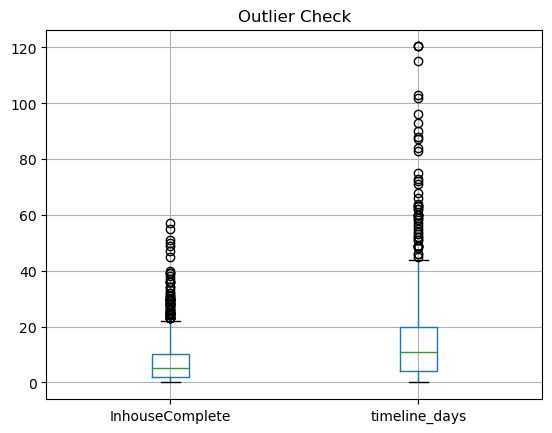

In [28]:
df1[outlier_cols].boxplot(vert=1)
plt.title("Outlier Check")
plt.show()

In [29]:
df1.columns

Index(['medical_profile', 'Country', 'LOI', 'InhouseComplete', 'IR_Perct',
       'timeline_days', 'Incentive_in_USD'],
      dtype='object')

In [30]:
df_dummy = pd.get_dummies(df1,drop_first=True,columns=['Country'])
df_dummy.head()

,medical_profile,LOI,InhouseComplete,IR_Perct,timeline_days,Incentive_in_USD,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA
0,Dermatology,20,2.0,11.764706,14.0,45.0,0,0,0,0,0,0,0,1
1,Oncology,25,14.0,77.777778,13.0,60.0,0,0,0,0,0,0,0,1
2,Dermatology,25,36.0,81.818182,10.0,55.0,0,0,0,0,0,0,0,1
3,Dermatology,15,6.0,13.636364,38.0,55.0,0,0,1,0,0,0,0,0
4,Obstetrics and Gynecology,30,3.0,42.857143,2.0,60.5,0,0,0,0,1,0,0,0


In [31]:
df_dummy.columns

Index(['medical_profile', 'LOI', 'InhouseComplete', 'IR_Perct',
       'timeline_days', 'Incentive_in_USD', 'Country_CANADA', 'Country_FRANCE',
       'Country_GERMANY', 'Country_INDIA', 'Country_ITALY', 'Country_SPAIN',
       'Country_UNITED KINGDOM', 'Country_USA'],
      dtype='object')

In [32]:
df_dummy.head()

,medical_profile,LOI,InhouseComplete,IR_Perct,timeline_days,Incentive_in_USD,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA
0,Dermatology,20,2.0,11.764706,14.0,45.0,0,0,0,0,0,0,0,1
1,Oncology,25,14.0,77.777778,13.0,60.0,0,0,0,0,0,0,0,1
2,Dermatology,25,36.0,81.818182,10.0,55.0,0,0,0,0,0,0,0,1
3,Dermatology,15,6.0,13.636364,38.0,55.0,0,0,1,0,0,0,0,0
4,Obstetrics and Gynecology,30,3.0,42.857143,2.0,60.5,0,0,0,0,1,0,0,0


In [34]:
from scipy import stats

In [35]:
# Perform Yeo-Johnson transformation
transformed_data, lambda_value = stats.yeojohnson(df1['InhouseComplete'])

In [69]:
# Create a dictionary to store the transformed data and lambda value
transformed_info = {
    'transformed_data': transformed_data,
    'lambda_value': lambda_value
}

In [71]:
import joblib

In [72]:
# Save the dictionary using joblib
joblib.dump(transformed_info, 'transformed_data.pkl')

['transformed_data.pkl']

In [36]:
df_dummy['InhouseComplete_transformed'] = pd.DataFrame(transformed_data)

In [37]:
df_dummy

,medical_profile,LOI,InhouseComplete,IR_Perct,timeline_days,Incentive_in_USD,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,InhouseComplete_transformed
0,Dermatology,20,2.0,11.764706,14.0,45.0,0,0,0,0,0,0,0,1,1.125635
1,Oncology,25,14.0,77.777778,13.0,60.0,0,0,0,0,0,0,0,1,2.876224
2,Dermatology,25,36.0,81.818182,10.0,55.0,0,0,0,0,0,0,0,1,3.914010
3,Dermatology,15,6.0,13.636364,38.0,55.0,0,0,1,0,0,0,0,0,2.031761
4,Obstetrics and Gynecology,30,3.0,42.857143,2.0,60.5,0,0,0,0,1,0,0,0,1.429506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,Neurology,10,15.0,83.333333,2.0,18.0,0,0,0,0,0,0,0,1,2.949045
934,Pediatrics,15,10.0,76.923077,0.0,25.2,0,0,0,1,0,0,0,0,2.529143
935,Dermatology,15,4.0,33.333333,1.0,33.0,0,0,0,0,0,1,0,0,1.667873
936,Dermatology,15,1.0,16.666667,3.0,33.0,0,0,0,0,1,0,0,0,0.703840


In [38]:
df_dummy.drop('InhouseComplete',axis=1,inplace=True)

In [39]:
df_dummy.rename(columns={'InhouseComplete_transformed': 'InhouseComplete'}, inplace=True)

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [41]:
train_df, test_df = train_test_split(df_dummy, test_size=0.3, random_state=42)

In [42]:
target_means = train_df.groupby('medical_profile')['InhouseComplete'].mean().to_dict()

In [43]:
train_df['medical_profile_encoded'] = train_df['medical_profile'].map(target_means)
test_df['medical_profile_encoded'] = test_df['medical_profile'].map(target_means)

In [73]:
# Save the target_means dictionary using joblib
joblib.dump(target_means, 'target_encoding_medical_profile.pkl')

['target_encoding_medical_profile.pkl']

In [44]:
test_df[test_df['medical_profile_encoded'] ==np.NaN]

,medical_profile,LOI,IR_Perct,timeline_days,Incentive_in_USD,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,InhouseComplete,medical_profile_encoded


In [45]:
test_df.dropna(inplace=True)

In [46]:
train_df

,medical_profile,LOI,IR_Perct,timeline_days,Incentive_in_USD,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,InhouseComplete,medical_profile_encoded
133,Internal Medicine,30,0.000000,11.0,135.0,1,0,0,0,0,0,0,0,0.000000,1.495110
512,Radiation Oncology,15,0.000000,15.0,38.5,0,1,0,0,0,0,0,0,0.000000,0.281409
888,Dermatology,10,88.235294,2.0,22.0,0,0,0,0,0,1,0,0,2.949045,1.769541
765,Oncology,10,79.310345,5.0,30.0,0,0,0,0,0,0,0,1,3.411309,2.309150
797,Rheumatology,35,36.734694,10.0,106.0,0,0,0,0,0,0,0,1,3.914010,1.985480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Dermatology,50,100.000000,2.0,121.0,0,1,0,0,0,0,0,0,0.703840,1.769541
270,Neurology,20,0.000000,22.0,75.0,1,0,0,0,0,0,0,0,0.000000,2.142097
860,Rheumatology,10,60.000000,2.0,22.0,0,1,0,0,0,0,0,0,1.429506,1.985480
435,Hematology,35,92.307692,60.0,80.0,0,0,0,0,0,0,0,1,3.914010,1.688367


In [47]:
X_train = train_df.drop(['medical_profile','InhouseComplete'], axis=1)
y_train = train_df['InhouseComplete']

X_test = test_df.drop(['medical_profile','InhouseComplete'], axis=1)
y_test = test_df['InhouseComplete']

In [48]:
X_train.head()

,LOI,IR_Perct,timeline_days,Incentive_in_USD,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,medical_profile_encoded
133,30,0.000000,11.0,135.0,1,0,0,0,0,0,0,0,1.495110
512,15,0.000000,15.0,38.5,0,1,0,0,0,0,0,0,0.281409
888,10,88.235294,2.0,22.0,0,0,0,0,0,1,0,0,1.769541
765,10,79.310345,5.0,30.0,0,0,0,0,0,0,0,1,2.309150
797,35,36.734694,10.0,106.0,0,0,0,0,0,0,0,1,1.985480


In [49]:
X_train.head()

,LOI,IR_Perct,timeline_days,Incentive_in_USD,Country_CANADA,Country_FRANCE,Country_GERMANY,Country_INDIA,Country_ITALY,Country_SPAIN,Country_UNITED KINGDOM,Country_USA,medical_profile_encoded
133,30,0.000000,11.0,135.0,1,0,0,0,0,0,0,0,1.495110
512,15,0.000000,15.0,38.5,0,1,0,0,0,0,0,0,0.281409
888,10,88.235294,2.0,22.0,0,0,0,0,0,1,0,0,1.769541
765,10,79.310345,5.0,30.0,0,0,0,0,0,0,0,1,2.309150
797,35,36.734694,10.0,106.0,0,0,0,0,0,0,0,1,1.985480


In [50]:
X_train_Num = X_train.iloc[:,:4]

In [51]:
X_train_Num

,LOI,IR_Perct,timeline_days,Incentive_in_USD
133,30,0.000000,11.0,135.0
512,15,0.000000,15.0,38.5
888,10,88.235294,2.0,22.0
765,10,79.310345,5.0,30.0
797,35,36.734694,10.0,106.0
...,...,...,...,...
106,50,100.000000,2.0,121.0
270,20,0.000000,22.0,75.0
860,10,60.000000,2.0,22.0
435,35,92.307692,60.0,80.0


In [52]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_Num.values, i) for i in range(X_train_Num.shape[1])],
    index=X_train_Num.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

LOI                 10.211348
IR_Perct             2.366973
timeline_days        2.000027
Incentive_in_USD    10.013852
dtype: float64



In [53]:
X_train_Num.drop('Incentive_in_USD',axis=1,inplace=True)

In [54]:
X_train_Num

,LOI,IR_Perct,timeline_days
133,30,0.000000,11.0
512,15,0.000000,15.0
888,10,88.235294,2.0
765,10,79.310345,5.0
797,35,36.734694,10.0
...,...,...,...
106,50,100.000000,2.0
270,20,0.000000,22.0
860,10,60.000000,2.0
435,35,92.307692,60.0


In [55]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train_Num.values, i) for i in range(X_train_Num.shape[1])],
    index=X_train_Num.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

LOI              2.685694
IR_Perct         2.365760
timeline_days    1.888616
dtype: float64



In [56]:
X_train.drop('Incentive_in_USD',axis=1,inplace=True)

In [57]:
X_test.drop('Incentive_in_USD',axis=1,inplace=True)

### Gradient boosting

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model to the training data
gbr.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = gbr.predict(X_train)

# Evaluate the model on the training set
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mpe_train = np.mean((y_train - y_train_pred) / y_train) * 100

# Make predictions on the testing set
y_test_pred = gbr.predict(X_test)

# Evaluate the model on the testing set
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
mpe_test = np.mean((y_test - y_test_pred) / y_test) * 100

In [59]:
# Create a DataFrame to store the results
results_df_GradientBoosting_train = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'R2 Score': [r2_train],
    'Mean Absolute Error': [mae_train],
    'Mean Squared Error': [mse_train],
    'Root Mean Squared Error': [rmse_train],
    'Mean Absolute Percentage Error': [mape_train],
    'Mean Percentage Error': [mpe_train]
})

In [60]:
# Create a DataFrame to store the results
results_df_GradientBoosting_test = pd.DataFrame({
    'Model': ['Gradient Boosting'],
    'R2 Score': [r2_test],
    'Mean Absolute Error': [mae_test],
    'Mean Squared Error': [mse_test],
    'Root Mean Squared Error': [rmse_test],
    'Mean Absolute Percentage Error': [mape_test],
    'Mean Percentage Error': [mpe_test]
})

In [61]:
results_df_GradientBoosting_train

,Model,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Mean Percentage Error
0,Gradient Boosting,0.850877,0.310446,0.165066,0.406283,inf,NaN


In [62]:
results_df_GradientBoosting_test

,Model,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error,Mean Percentage Error
0,Gradient Boosting,0.786731,0.394273,0.264907,0.514692,inf,NaN


In [63]:
pd.DataFrame(gbr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp',ascending=False)

,Imp
IR_Perct,0.700987
medical_profile_encoded,0.090375
Country_USA,0.071379
timeline_days,0.039140
LOI,0.027358
Country_FRANCE,0.023362
Country_SPAIN,0.017459
Country_UNITED KINGDOM,0.014465
Country_ITALY,0.007498
Country_GERMANY,0.003656


In [74]:
import pickle

In [75]:
pickle.dump(gbr,open('gbr.pkl','wb'))

In [76]:
pickled_model =pickle.load(open('gbr.pkl','rb'))